# Definition
## **Undirected Graphs**
- **Definition:**
An edge is a bridge if its removal increases the number of connected components (i.e., disconnects the graph).
- **Algorithm:**
Tarjan’s bridge-finding algorithm is classically designed for undirected graphs.
    - When you find a back edge (neighbor `v` is visited and not the parent of `u`), you update `low[u] = min(low[u], disc[v])`.
    - The bridge condition is:
If `low[v] > disc[u]`, then edge `(u, v)` is a bridge.
***
## **Directed Graphs**
- **Definition:**
A bridge in a directed graph is an edge whose removal increases the number of strongly connected components.
- **Algorithm:**
The classical Tarjan’s bridge-finding algorithm **does not directly apply** to directed graphs.
    - The concept of "parent" is less meaningful, and the bridge condition is more complex.
    - You cannot simply use the same low-link and discovery time logic as in the undirected case.
    - In practice, finding bridges in directed graphs typically involves running Tarjan’s SCC algorithm, removing each edge one at a time, and checking if the number of SCCs increases—a much less efficient process.
***
For simplicity, we shall only focus on the application of Tarjan's algorithm for finding bridges for **un-directed graphs only**.
***
## Defining the graph

In [1]:
edges = [
    (1, 2),
    (1, 4),
    (2, 3),
    (3, 4),
    (4, 5),
    (5, 6),
    (6, 7),
    (7, 8),
    (8, 9),
    (6, 9),
    (8, 10),
    (10, 11),
    (11, 12),
    (10, 12)
]

incidence_matrix = [[0 for i in range(12)] for j in range(12)]

for u, v in edges:
    incidence_matrix[u - 1][v - 1] = 1
    incidence_matrix[v - 1][u - 1] = 1

incidence_matrix

[[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]]

## Visualizing the graph

In [2]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(i[0], i[1], weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(i + 1, j + 1, weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

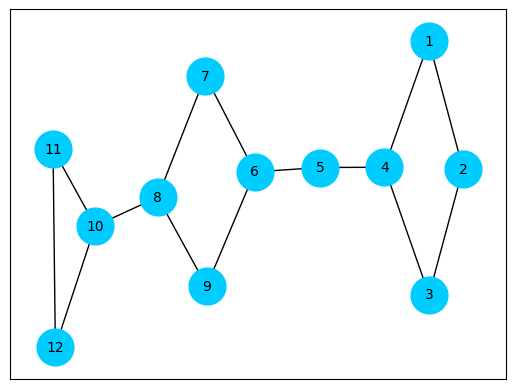

In [3]:
G1 = GraphVisualization(weighted = False, adjancency_matrix = incidence_matrix, isDirected = False)
G1.visualize()

# Algorithm
- First, we need to create the adjacency list for the given graph from the edge information(If not already given). And we will declare a variable timer(either globally or we can carry it while calling DFS), that will keep track of the time of insertion for each node.
- Then we will start DFS from node 0(assuming the graph contains a single component otherwise, we will call DFS for every component) with parent -1.
  - Inside DFS, we will first mark the node visited and then store the time of insertion and the lowest time of insertion properly. The timer may be initialized to 0 or 1.
  - Now, it’s time to visit the adjacent nodes. 
    - If the adjacent node is the parent itself, we will just continue to the next node.
    - If the adjacent node is not visited, we will call DFS for the adjacent node with the current node as the parent.<br/>After the DFS gets completed, we will compare the lowest time of insertion of the current node and the adjacent node and take the minimum one.<br/>Now, we will check if the lowest time of insertion of the adjacent node is greater than the time of insertion of the current node.
If it is, then we will store the adjacent node and the current node in our answer array as they are representing the bridge.
    - If the adjacent node is already visited, we will just compare the lowest time of insertion of the current node and the adjacent node and take the minimum one.
- Finally, our answer array will store all the bridges.
***

In [4]:
from typing import List

class graphTraversal:
    def __init__(self, graph_: List[List[int]]):
        self.searchTime = 0
        self.bridges = []
        self.graph = graph_[:]
        self.numVertices = len(self.graph)
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]
        self.visitedVertices = [False for i in range(self.numVertices)]

    def reset(self):
        self.numVertices = len(self.unvisitedVertices)
        self.lowLinkValues = [0 for i in range(self.numVertices)]
        self.searchTimes = [0 for i in range(self.numVertices)]

    def dfs(self, vertex = 0, parent = 0):
        # if vertex already visited, return it's low-link value
        if self.visitedVertices[vertex]:
            return self.lowLinkValues[vertex]

        self.searchTime += 1

        # if low link value of vertex is not set
        self.searchTimes[vertex] = self.searchTime
        self.lowLinkValues[vertex] = self.searchTime
        
        # add vertex to list of visited vertex
        self.visitedVertices[vertex] = True
        
        # traverse all edges
        for edge in range(self.numVertices):
            if self.graph[vertex][edge] == 1 and not edge == parent:
                result = self.dfs(edge, vertex)
                if result < self.lowLinkValues[vertex]:
                    self.lowLinkValues[vertex] = result
                elif result > self.searchTimes[vertex]:  # see important interview question
                    if (vertex + 1, edge + 1) not in self.bridges:
                        self.bridges.append((vertex + 1, edge + 1))
        
        # remove the current vertex from the visited array
        self.visitedVertices[vertex] = False
        return self.lowLinkValues[vertex]

In [5]:
graph = graphTraversal(incidence_matrix)
graph.dfs()
graph.bridges

[(8, 10), (5, 6), (4, 5)]

## Interview question
What's the problem if we use `lowLink[edge] > lowLink[vertex]`?
### **Why is `lowLink[edge] > disc[vertex]` the correct condition?**

- **`disc[vertex]`** is the time when the DFS first discovers `vertex`.
- **`lowLink[edge]`** is the lowLinkest discovery time reachable from `edge` (including itself and its descendants, possibly via back edges).

The correct bridge condition:
> **If `lowLink[edge] > disc[vertex]`, then the edge `(vertex, edge)` is a bridge.**

This means:
After DFS from `vertex` to `edge`, if `edge` (and its descendants) cannot reach `vertex` or any of its ancestors via a back edge (i.e., `lowLink[edge]` is strictly greater than `disc[vertex]`), then removing `(vertex, edge)` would disconnect the graph.

### **Why is `lowLink[edge] > lowLink[vertex]` incorrect?**

- **`lowLink[vertex]`** may have been updated by other child subtrees or back edges, not just the current DFS path to `edge`.
- Comparing `lowLink[edge]` to `lowLink[vertex]` does **not** tell you whether `edge`'s subtree can reach above `vertex` in the DFS tree.
- This can result in:
    - **Missing bridges:** If `lowLink[vertex]` has been lowLinkered by another subtree, but `edge`'s subtree is truly only connected via `(vertex, edge)`, you won't detect the bridge.
    - **False bridges:** If `lowLink[vertex]` is higher due to lack of back edges elsewhere, you might incorrectly report a bridge.
***